In [43]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

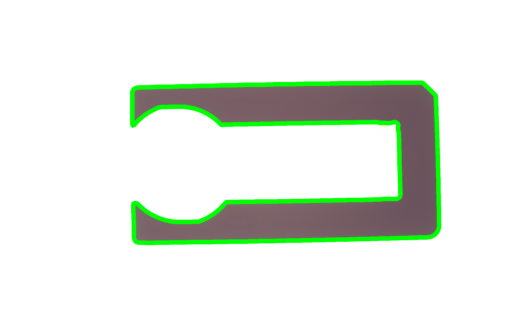

In [36]:
image_path = '/home/hp/Documents/Daily_Task/Day_2/Motor_Sparings_Capstone_Project/Assets/Motor_Stampings2.png'
original_image = cv2.imread(image_path)
copy_image = original_image.copy()
gray = cv2.cvtColor(original_image, cv2.COLOR_BGR2GRAY)

thresh_val, thresh_img = cv2.threshold(gray, 150, 255, cv2.THRESH_BINARY_INV)

contours, _ = cv2.findContours(thresh_img, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)

cv2.drawContours(copy_image, contours, -1, (0,255,0), 15, cv2.LINE_AA)
plt.imshow(copy_image) 
plt.axis('off')
plt.show()


Contour 1: Bounding Box (x=473, y=281, w=1189, h=621)


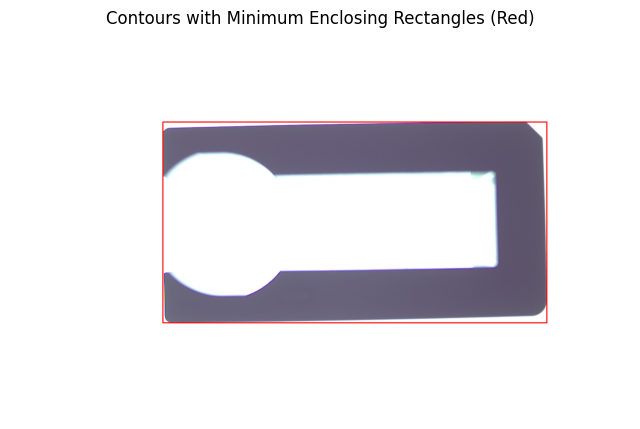

In [47]:
import cv2
import matplotlib.pyplot as plt
import numpy as np 

image_path = '/home/hp/Documents/Daily_Task/Day_2/Motor_Sparings_Capstone_Project/Assets/Motor_Stampings2.png'
original_image = cv2.imread(image_path)
copy_image = original_image.copy()
gray = cv2.cvtColor(original_image, cv2.COLOR_BGR2GRAY)

thresh_val, thresh_img = cv2.threshold(gray, 150, 255, cv2.THRESH_BINARY_INV)

contours, _ = cv2.findContours(thresh_img, cv2.RETR_CCOMP, cv2.CHAIN_APPROX_SIMPLE)

for i, contour in enumerate(contours):

    x, y, w, h = cv2.boundingRect(contour)
    cv2.rectangle(copy_image, (x, y), (x + w, y + h), (0, 0, 255), 2, cv2.LINE_AA)

    print(f"Contour {i+1}: Bounding Box (x={x}, y={y}, w={w}, h={h})")


# 3. Display the result
plt.figure(figsize=(8, 8))
plt.imshow(cv2.cvtColor(copy_image, cv2.COLOR_BGR2RGB)) # Convert BGR to RGB for matplotlib
plt.title('Contours with Minimum Enclosing Rectangles (Red)')
plt.axis('off')
plt.show()

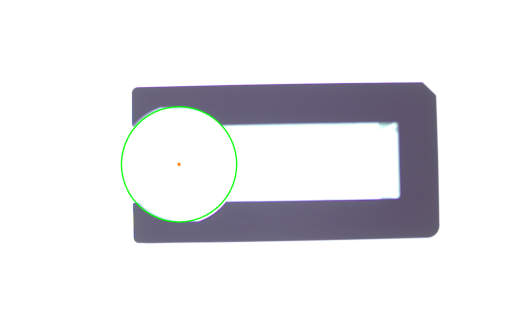

In [38]:
image_path = '/home/hp/Documents/Daily_Task/Day_2/Motor_Sparings_Capstone_Project/Assets/Motor_Stampings2.png'
original_image = cv2.imread(image_path)
copy_image = original_image.copy()
gray = cv2.cvtColor(original_image, cv2.COLOR_BGR2GRAY)
canny = cv2.Canny(gray, 50,150)
circles = cv2.HoughCircles(gray, cv2.HOUGH_GRADIENT, 1.4, 100)
if circles is not None:
	# convert the (x, y) coordinates and radius of the circles to integers
	circles = np.round(circles[0, :]).astype("int")
	# loop over the (x, y) coordinates and radius of the circles
	for (x, y, r) in circles:
		# draw the circle in the output image, then draw a rectangle
		# corresponding to the center of the circle
		cv2.circle(copy_image, (x, y), r, (0, 255, 0), 4)
		cv2.rectangle(copy_image, (x - 5, y - 5), (x + 5, y + 5), (0, 128, 255), -1)

    # Convert the output image to RGB for correct colors in Matplotlib
output_rgb = cv2.cvtColor(copy_image, cv2.COLOR_BGR2RGB)
plt.imshow(output_rgb, cmap="gray")
plt.axis('off')
plt.show()

73


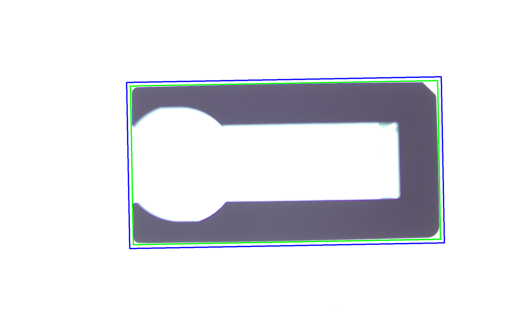

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load
img = cv2.imread('/home/hp/Documents/Daily_Task/Day_2/Motor_Sparings_Capstone_Project/Assets/Motor_Stampings2.png')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# 1. Remove background
h, w = gray.shape
mask = np.zeros((h+2, w+2), np.uint8)
ff = gray.copy()
cv2.floodFill(ff, mask, (0,0), 0)

# 2. Threshold metal vs hole
th = cv2.adaptiveThreshold(ff, 255,
                           cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                           cv2.THRESH_BINARY_INV,
                           51, 5)

# 3. Remove tiny noise
kernel = np.ones((7,7), np.uint8)
th = cv2.morphologyEx(th, cv2.MORPH_CLOSE, kernel)

# 4. Contours with CCOMP hierarchy
contours, hierarchy = cv2.findContours(th, cv2.RETR_CCOMP, cv2.CHAIN_APPROX_SIMPLE)

# FILTERING
outer_cnt = None
inner_cnt = None

max_outer_area = 0
max_inner_area = 0

for i, cnt in enumerate(contours):
    area = cv2.contourArea(cnt)
    parent = hierarchy[0][i][3]

    # --- OUTER SHAPE (parent = -1) ---
    if parent == -1 and area > max_outer_area:
        max_outer_area = area
        outer_cnt = cnt

    # --- INNER HOLE (parent >= 0) ---
    if parent != -1 and area > max_inner_area:
        max_inner_area = area
        inner_cnt = cnt

# compute rectangles
rect_outer = cv2.minAreaRect(outer_cnt)
outer_box = cv2.boxPoints(rect_outer).astype(int)

rect_inner = cv2.minAreaRect(inner_cnt)
inner_box = cv2.boxPoints(rect_inner).astype(int)

# draw
out = img.copy()
cv2.drawContours(out, [outer_box], 0, (255,0,0), 4) # BLUE outer
cv2.drawContours(out, [inner_box], 0, (0,255,0), 4) # GREEN inner
plt.imshow(out[...,::-1])
plt.axis('off')
plt.show()


Detected 1 circle(s)
Circle 1: Center (398, 338), Radius 74


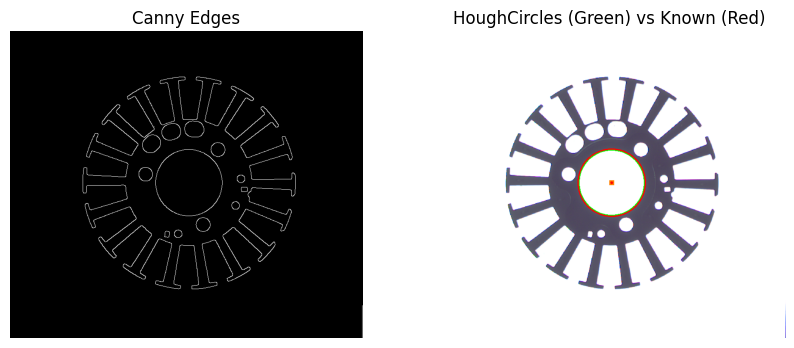

In [9]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Your image path and known values
image_path = '/home/hp/Documents/Daily_Task/Day_2/Motor_Sparings_Capstone_Project/Assets/Motor_Stampings.png'
known_radius = 75  # From your contour print
approx_center = (398, 338)  # Use as guide for minDist

original_image = cv2.imread(image_path)
if original_image is None:
    print("Error: Could not load image.")
    exit()

copy_image = original_image.copy()
gray = cv2.cvtColor(original_image, cv2.COLOR_BGR2GRAY)

# Optional: Light Gaussian blur to bridge tiny edge gaps (helps Hough votes)
gray_blurred = cv2.GaussianBlur(gray, (3, 3), 0)

# Canny edges (your params)
canny = cv2.Canny(gray_blurred, 50, 150)  # Use blurred for input

# HoughCircles with radius constraint
# dp=1 (full res), minDist ~ image size to get 1 circle, param1=Canny thresh, param2=vote thresh
h, w = gray.shape
min_dist = np.sqrt(h**2 + w**2) / 2  # Large to avoid duplicates
circles = cv2.HoughCircles(
    gray_blurred,  # Use blurred gray for gradient computation
    cv2.HOUGH_GRADIENT, 
    dp=1,  # Inverse resolution of accumulator
    minDist=min_dist,
    param1=50,  # Canny upper thresh (matches your Canny)
    param2=40,  # Min votes (tune: 40-80; higher = stricter)
    minRadius=known_radius - 5,  # 70
    maxRadius=known_radius + 5   # 80
)

if circles is not None:
    # Round to ints
    circles = np.round(circles[0, :]).astype("int")
    print(f"Detected {len(circles)} circle(s)")
    for i, (x, y, r) in enumerate(circles):
        print(f"Circle {i+1}: Center ({x}, {y}), Radius {r}")
        # Draw circle (green) and center rect (orange)
        cv2.circle(copy_image, (x, y), r, (0, 255, 0), 4)
        cv2.rectangle(copy_image, (x - 5, y - 5), (x + 5, y + 5), (0, 128, 255), -1)
        
        # Bonus: Compare to known center/radius (red dashed circle)
        cv2.circle(copy_image, approx_center, known_radius, (0, 0, 255), 2)
        cv2.circle(copy_image, approx_center, 3, (0, 0, 255), -1)
else:
    print("No circles detected—try lowering param2 to 40 or widening radius range.")

# Visualize
output_rgb = cv2.cvtColor(copy_image, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(canny, cmap='gray')
plt.title('Canny Edges')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(output_rgb)
plt.title('HoughCircles (Green) vs Known (Red)')
plt.axis('off')
plt.show()

# # Optional: Save
# cv2.imwrite('hough_with_known_radius.png', copy_image)

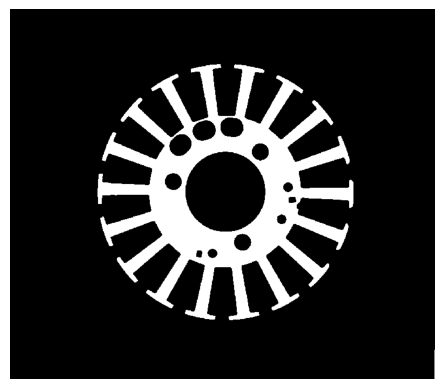

In [31]:
image_path = '/home/hp/Documents/Daily_Task/Day_2/Motor_Sparings_Capstone_Project/Assets/Motor_Stampings.png'
original_image = cv2.imread(image_path)

gray_image = cv2.cvtColor(original_image, cv2.COLOR_BGR2GRAY)
_, thresh = cv2.threshold(gray_image, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
plt.imshow(thresh, cmap="gray")
plt.axis('off')
plt.show()

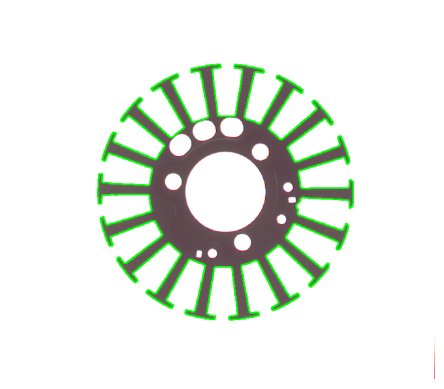

In [32]:
contours, _ = cv2.findContours(thresh, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
max_area = 25000

filtered_contours = []
for contour in contours:
    area = cv2.contourArea(contour)

    if area > max_area:
        filtered_contours.append(contour)

result_img = original_image.copy()
cv2.drawContours(result_img, filtered_contours, -1, (0, 255, 0), 2)
plt.imshow(result_img)
plt.axis('off')
plt.show()


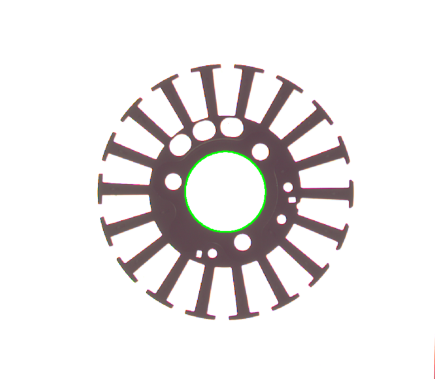

In [33]:
contours, _ = cv2.findContours(thresh, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
min_area = 1400
max_area = 25000

filtered_contours = []
for contour in contours:
    area = cv2.contourArea(contour)

    if min_area < area < max_area:
        filtered_contours.append(contour)

result_img = original_image.copy()
cv2.drawContours(result_img, filtered_contours, -1, (0, 255, 0), 2)
plt.imshow(result_img)
plt.axis('off')
plt.show()

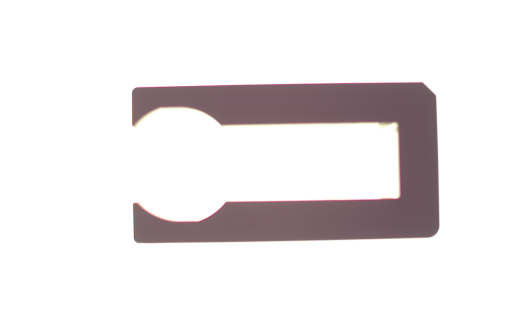

In [41]:
image_path = '/home/hp/Documents/Daily_Task/Day_2/Motor_Sparings_Capstone_Project/Assets/Motor_Stampings2.png'
original_image1 = cv2.imread(image_path)
copy_image1 = original_image1.copy()
gray = cv2.cvtColor(original_image1, cv2.COLOR_BGR2GRAY)
edge = cv2.Canny(gray, 50, 150)

lines = cv2.HoughLinesP(
    edge,
    rho=1,
    theta=np.pi / 180,
    threshold=80,
    minLineLength=867,
    maxLineGap=284
)
if lines is not None:
    for line in lines:
        x1, y1, x2, y2 = line[0]
        cv2.line(copy_image1, (x1, y1), (x2, y2), (0, 0, 255), 3)

plt.imshow(copy_image1)
plt.axis('off')
plt.show()

Outer Circle: Center (397, 338), Radius 199 px


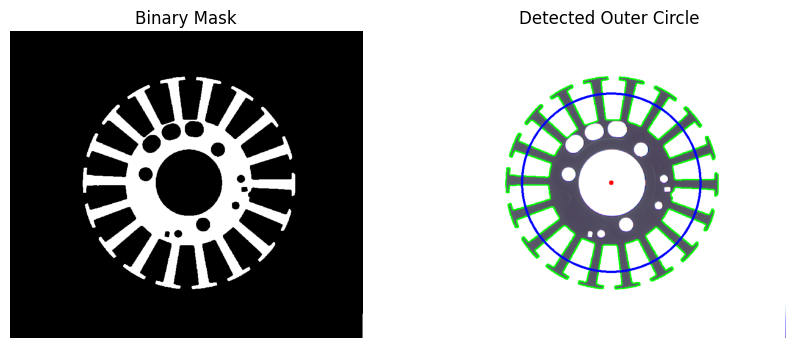

In [10]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load image (replace with your path)
image_path = '/home/hp/Documents/Daily_Task/Day_2/Motor_Sparings_Capstone_Project/Assets/Motor_Stampings.png'
original = cv2.imread(image_path)
gray = cv2.cvtColor(original, cv2.COLOR_BGR2GRAY)

# Step 1: Binary threshold (OTSU for auto)
_, binary = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

# Step 2: Close gaps (optional, for wide slots)
kernel = np.ones((3, 3), np.uint8)
binary = cv2.morphologyEx(binary, cv2.MORPH_CLOSE, kernel)

# Step 3: Find contours, pick largest
contours, _ = cv2.findContours(binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
if not contours:
    raise ValueError("No contours found")
outer_contour = max(contours, key=cv2.contourArea)

# Step 4: Least-squares circle fit (robust to discontinuities)
def least_squares_circle_fit(points):
    """Fit circle via algebraic least-squares (x² + y² + Dx + Ey + F = 0)"""
    x, y = points[:, 0], points[:, 1]
    A = np.c_[x, y, np.ones(x.shape)]
    b = -(x**2 + y**2)
    coeffs = np.linalg.lstsq(A, b, rcond=None)[0]
    D, E, F = coeffs
    cx, cy = -D/2, -E/2
    r = np.sqrt((D/2)**2 + (E/2)**2 - F)
    return (cx, cy), r

points = outer_contour.reshape(-1, 2).astype(np.float32)
(center, radius) = least_squares_circle_fit(points)
center = (int(center[0]), int(center[1]))
radius = int(radius)

print(f"Outer Circle: Center {center}, Radius {radius} px")

# Visualize
result = original.copy()
cv2.drawContours(result, [outer_contour], -1, (0, 255, 0), 2)
cv2.circle(result, center, radius, (255, 0, 0), 3)
cv2.circle(result, center, 5, (0, 0, 255), -1)  # Center dot

# Plot
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1); plt.imshow(binary, cmap='gray'); plt.title('Binary Mask'); plt.axis('off')
plt.subplot(1, 2, 2); plt.imshow(cv2.cvtColor(result, cv2.COLOR_BGR2RGB)); plt.title('Detected Outer Circle'); plt.axis('off')
plt.show()

# # Save
# cv2.imwrite('outer_circle_detected.png', result)